In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

d:\Code_dumpspace\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Sampreet\.cache\kagglehub\datasets\techsash\waste-classification-data\versions\1


In [2]:
import shutil
import os

source_directory = "C:/Users/Sampreet/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1"
# Path to dataset files: C:\Users\Sampreet\.cache\kagglehub\datasets\techsash\waste-classification-data\versions\1
destination_directory = "waste_classification_data"  # Visible directory name (relative path)

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# Construct the full destination path
full_destination_path = os.path.join(destination_directory, "1") #Creates a folder called 1 inside the destination folder.

try:
    shutil.copytree(source_directory, full_destination_path)
    print(f"Directory copied to: {full_destination_path}")
except FileExistsError:
    print(f"Destination directory '{full_destination_path}' already exists.")
except FileNotFoundError:
    print(f"Source directory '{source_directory}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Destination directory 'waste_classification_data\1' already exists.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
import cv2

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
#from tensorflow.keras.utils import plot_model

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# train_path = "waste_classification_data/1/DATASET/TRAIN"
# test_path = "waste_classification_data/1/DATASET/TEST"

In [2]:
# x_data = []
# y_data = []

# for category in glob(train_path+'/*'):
#     for file in tqdm(glob(category+'/*')):
#         img_array=cv2.imread(file)
#         img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
#         x_data.append(img_array)
#         y_data.append(category.split("/")[-1])

# data=pd.DataFrame({'image': x_data,'label': y_data})

In [6]:
import os
import cv2
import random
import pandas as pd
from glob import glob
from tqdm import tqdm

# Paths (same as provided)
train_path = "waste_classification_data/1/DATASET/TRAIN"
test_path = "waste_classification_data/1/DATASET/TEST"

In [7]:
# Data storage
x_data = []
y_data = []

# Get all categories
categories = glob(train_path + '/*')

# Number of images to select
total_images = 5000
images_per_category = total_images // len(categories)  # Distribute images equally

# Iterate through each category
for category in categories:
    category_name = category.split("/")[-1]  # Extract category name
    image_files = glob(category + '/*')

    # Randomly select images (handle cases where a category has fewer images)
    selected_files = random.sample(image_files, min(images_per_category, len(image_files)))

    # Load selected images
    for file in tqdm(selected_files, desc=f"Processing {category_name}"):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        x_data.append(img_array)
        y_data.append(category_name)  # Store label

# Convert to DataFrame
data = pd.DataFrame({'image': x_data, 'label': y_data})

print(f"✅ Dataset ready with {len(data)} images")

Processing TRAIN\R: 100%|██████████| 2500/2500 [00:39<00:00, 63.26it/s]

✅ Dataset ready with 5000 images


In [8]:
data.shape

(5000, 2)

In [9]:
from collections import Counter
Counter(y_data)

Counter({'TRAIN\\O': 2500, 'TRAIN\\R': 2500})

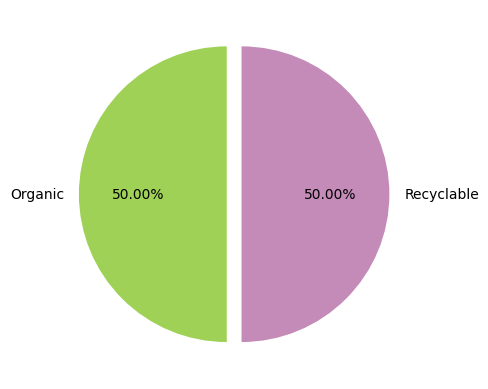

In [10]:
colors = ['#a0d157','#c48bb8']

plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=1)
plt.show()

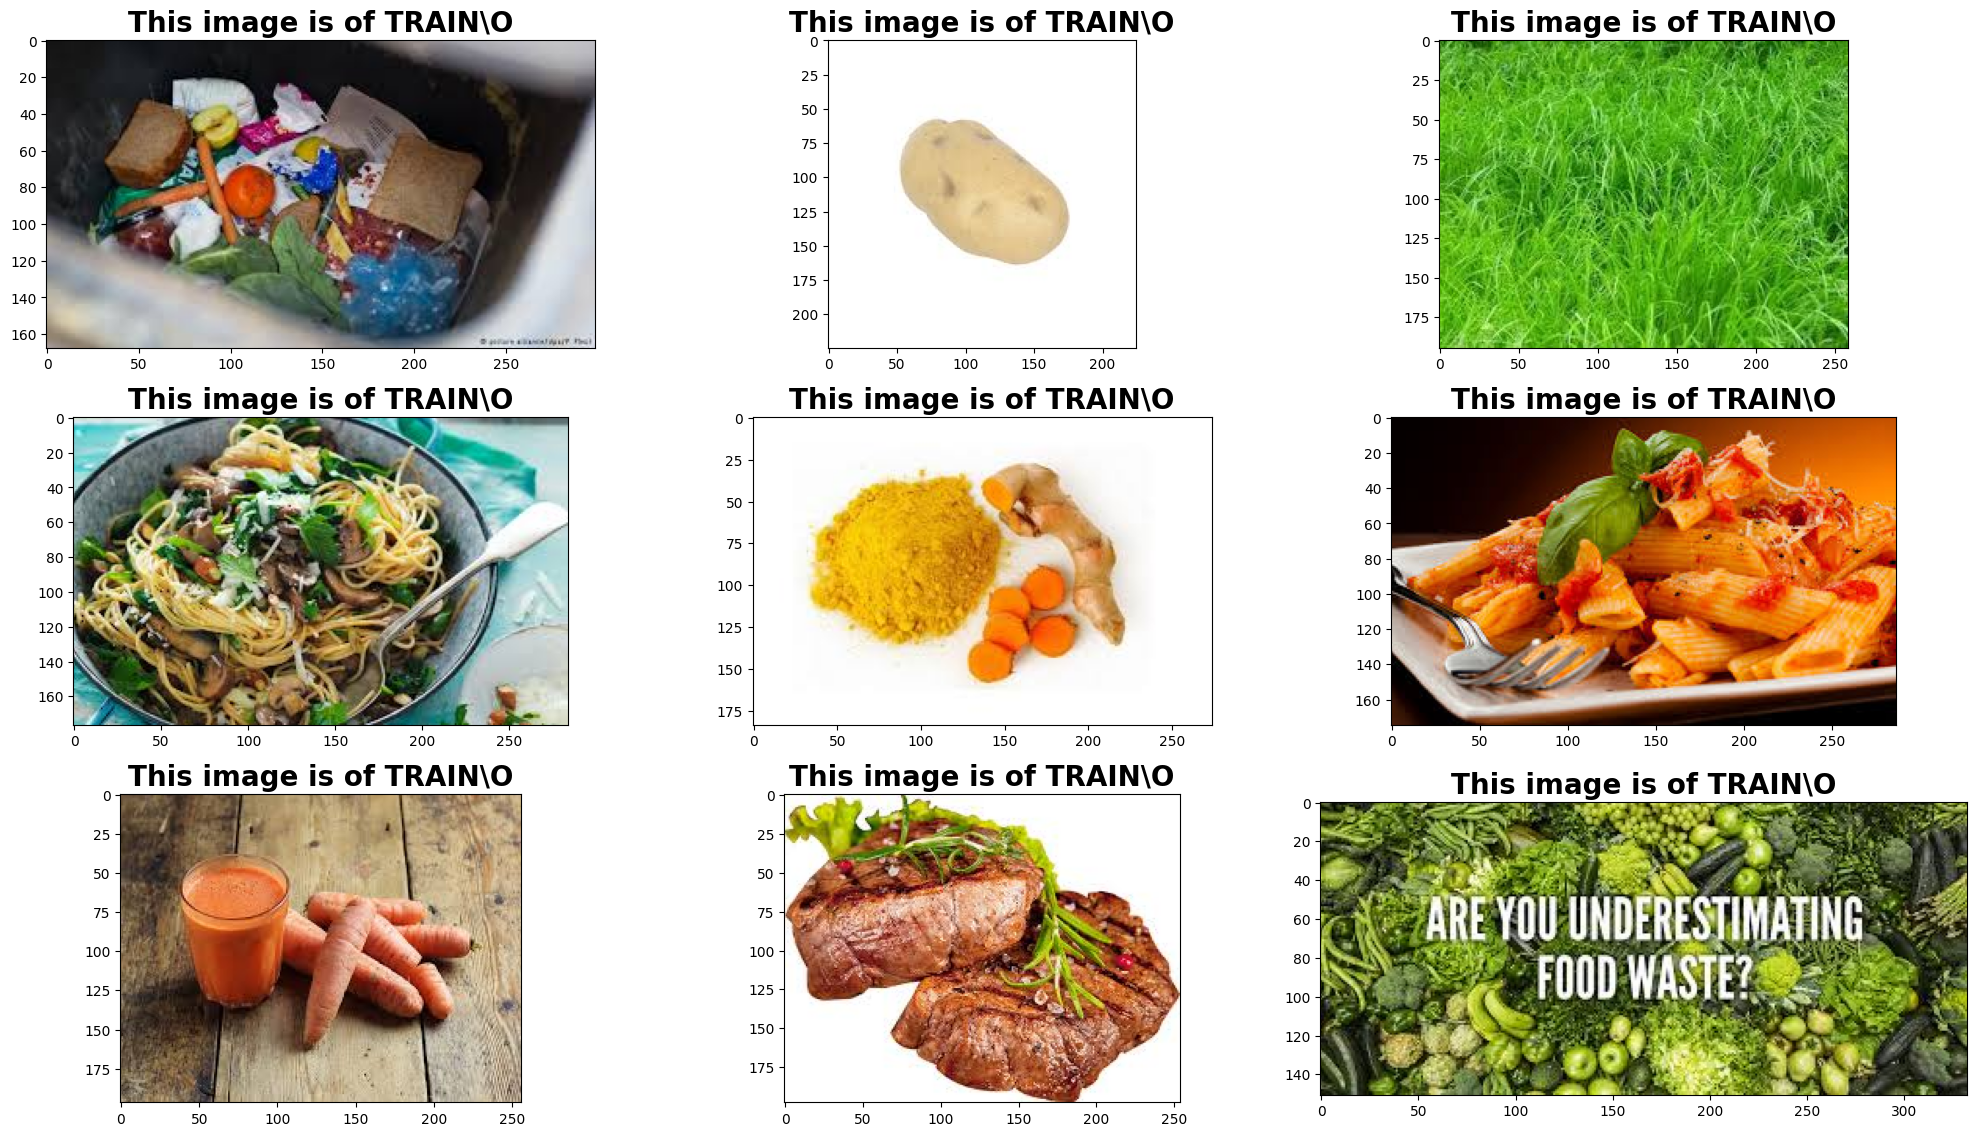

In [12]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    # index=np.random.randint(15000)
    index=np.random.randint(1000)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [13]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


In [14]:
model = Sequential()
# Convolutional Block 1
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), padding='same'))
model.add(BatchNormalization())  # Add batch normalization
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 2
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())  # Add batch normalization
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 3
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())  # Add batch normalization
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass))  # Output layer
model.add(Activation("sigmoid"))

In [15]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,801,090 (98.42 MB)

 Trainable params: 25,800,642 (98.42 MB)

 Non-trainable params: 448 (1.75 KB)

In [17]:
train_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)

In [27]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size= (512,512), #224,224
        batch_size = 128,        #32
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size= (512,512),
        batch_size = 128,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [28]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Train the model
hist = model.fit(
    x=train_generator,
    epochs=10,
    validation_data = test_generator,
    callbacks = [early_stopping]  # Add Early Stopping
)

Epoch 1/10


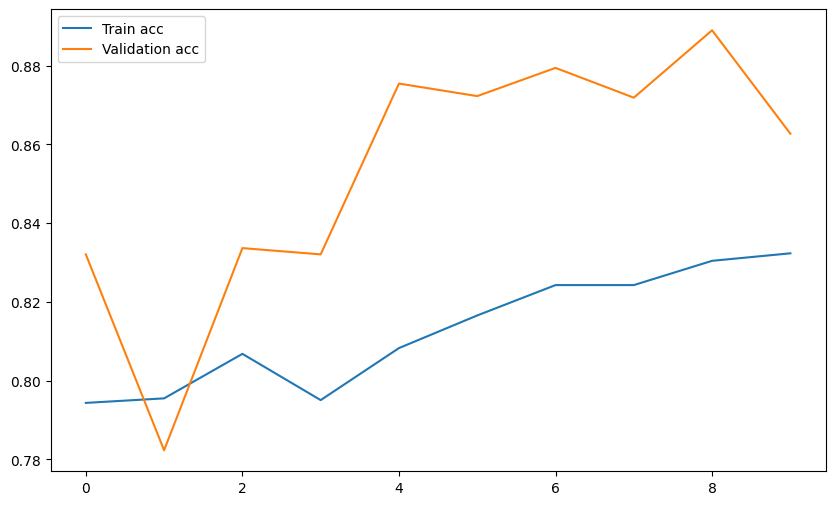

In [22]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

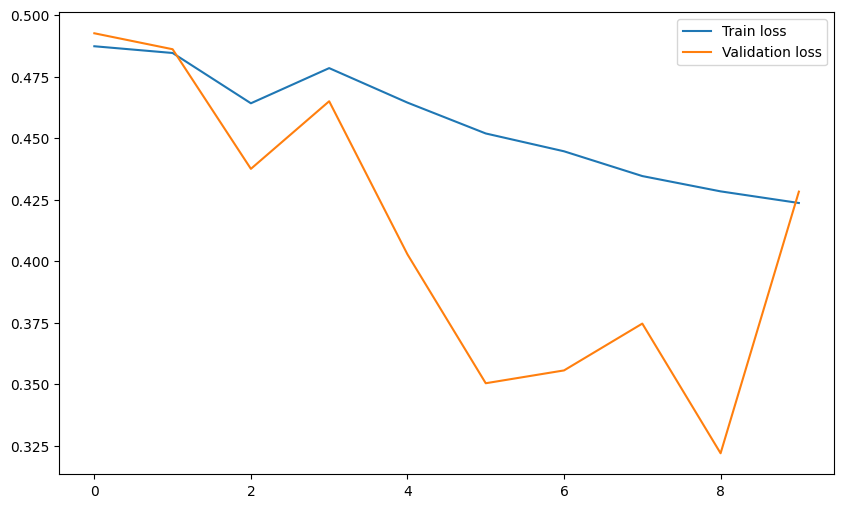

In [23]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [24]:
# After training the model, save it to a file
model.save('waste_classifier_cnn.h5')

In [33]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2 # Make sure to import cv2

# Path to the trained model and test image
model_path = 'waste_classifier_cnn.h5'
test_img = r"plastic_img.jpg"  # Store the path as a string
#test_img = cv2.imread("DATASET/TEST/O/O_12573.jpg")

In [34]:
# Load the trained model
model = tf.keras.models.load_model(model_path)

In [35]:
def predict_func(img_path):  # Update function to accept image path
    img = cv2.imread(img_path)  # Read the image using cv2.imread
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # Now img is a NumPy array
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
This image -> Recyclable


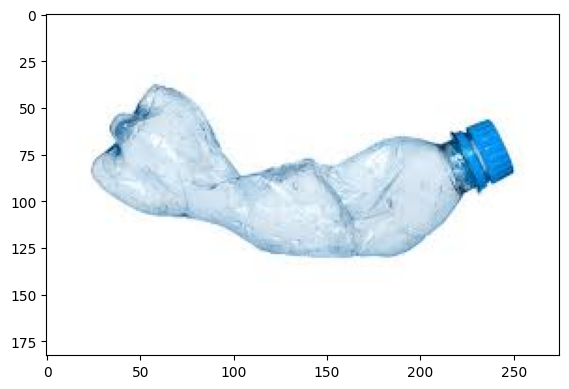

In [36]:
# Call predict_func with the image path
predict_func(test_img)

In [1]:
import psutil
print(f"Memory usage: {psutil.virtual_memory().percent}%")

Memory usage: 55.1%
